# 04 - Rhythm Spectrogram Example Figures

## Imports

In [1]:
import avn.timing as timing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

## Adult Examples

In [2]:
Bird_ID = 'B555'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short fo

In [3]:
plt.rcParams.update({'font.size': 8})

In [20]:
def plot_rhythm_spectrogram(self = rhythm_analysis,
                                figsize = (6, 6),
                                cbar = False, 
                                title = None, 
                                smoothing_window = 1, cmap = 'rocket', 
                                out_path = None):
        """Plot rhythm spectrogram

        Plots the rhythm spectrogram of the given RhythmAnalysis object. This requires that the 
        object already have a .rhythm_spectrogram attribute, which is created by running 
        `rhythm_analysis.make_rhythm_spectrogram()`.

        :param figsize: width and height of figure in inches, defaults to (6, 6)
        :type figsize: tuple, optional
        :param cbar: If True, the colorbar will be including in the figure. If False, it will be omitted. defaults to False
        :type cbar: bool, optional
        :param title: Plot's title. If not specified, the bird ID associated with the `RhythmAnalysis` object will be used as the title.
             defaults to None
        :type title: string, optional
        :param smoothing_window: Size of smoothing window in song files to apply to the rhythm spectrogram. A value of 1 results in no smoothing. 
            Values greater than one result in the mean of `smoothing_window` spectra being displayed. Higher `smoothing_window` 
            values can obscure rendition-to-rendition variability, but make it easier to see consistent harmonic patterns in the 
             rhythm spectrogram, when present. defaults to 1
        :type smoothing_window: int, optional
        :param cmap: matplotlib color map name, defaults to 'rocket'
        :type cmap: str, optional
        :return: figure of the rhythm spectrogram
        :rtype: matplotlib.figure
        """
        if not hasattr(self, 'rhythm_spectrogram'):
            raise RuntimeError("You must first create the rhythm spectrogram by calling the function `.make_rhythm_spectrogram()`.")
        
        rhythm_spectrogram = self.rhythm_spectrogram

        #round index for nicer y axis tick labels
        rhythm_spectrogram.index = [round(x, 2) for x in np.array(rhythm_spectrogram.index)]
        #Number columns 
        rhythm_spectrogram.columns = np.arange(rhythm_spectrogram.shape[1])
        #apply smoothing window to spectrogram
        rhythm_spectrogram = rhythm_spectrogram.rolling(smoothing_window, axis = 1).mean().dropna(axis = 1)
        if title is None:
            title = self.Bird_ID

        #make figure
        fig = plt.figure(figsize = figsize)
        sns.heatmap(rhythm_spectrogram, cbar = cbar, cmap = cmap)
        plt.title(title)
        #plt.xlabel('')
        #plt.ylabel('')
        plt.xticks([])
        plt.yticks([])

        if out_path is not None:
            plt.savefig(out_path, transparent = True,)

        return fig

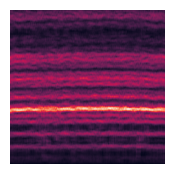

In [27]:
fig = plot_rhythm_spectrogram(rhythm_analysis, smoothing_window=10, 
                                        figsize = (2,2), 
                                        title = '', 
                                        out_path = 'B555_tiny_rhythm_spectrogram.png')


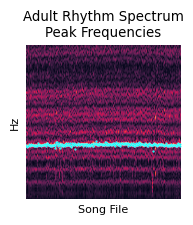

In [19]:
peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
fig = rhythm_analysis.plot_peak_frequencies(figsize = (2, 2), title = 'Adult Rhythm Spectrum\nPeak Frequencies', s = 2)
plt.xticks([])
plt.yticks([])
fig.savefig('B555_peak_rhythm_spectrum_frequencies.png', transparent = True, bbox_inches='tight')

In [25]:
def plot_spectrogram(spectrogram, sample_rate, ax = None, figsize = (20, 5), out_path = None):
    """
    Plots a spectrogram of a song. 

    Parameters
    ----------
    spectrogram : numpy ndarray, 2D
        Array containing spectrogram data. 
    sample_rate : int
        Sample rate of audio. Necessary to determine time along the x-axis. 
    ax: matplotlob.axes._subplots.AxesSubplot object
        Axis object must be specified if you want to plot the spectrogram as a 
        subplot within a matplotlib.pyplot figure with other subplots as well. 
        If plotting a spectrogram alone, ax doesn't need to be specified.
    figsize : tuple of floats, optional
        Specifies the dimensions of the output plot. The default is (20, 5).

    Returns
    -------
    None.

    """
    #Create plot with given dimensions
    fig, ax = plt.subplots(figsize = figsize, facecolor = 'white')
    #plot spectrogram
    img = librosa.display.specshow(spectrogram, sr = sample_rate, 
                             hop_length = 512 / 4, 
                             x_axis = 'time', 
                             y_axis = 'hz', 
                             cmap = 'viridis', 
                             ax = ax)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticks([])

    for spine in ax.spines.values():
            spine.set_edgecolor('white')

    if out_path is not None:
        fig.savefig(out_path, transparent = True, bbox_inches = 'tight')

In [18]:
import avn.dataloading
import avn.plotting
import glob
import librosa

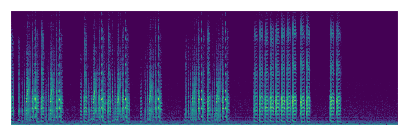

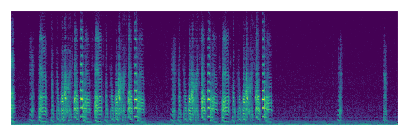

In [20]:
Bird_ID = 'B555'

song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

song_files = glob.glob(song_folder_path + "*.wav")

for i in range(18, 20):
    song_path = song_files[i]
    song = avn.dataloading.SongFile(song_path)
    spectrogram = avn.plotting.make_spectrogram(song)
    plot_spectrogram(spectrogram, song.sample_rate, figsize = (5, 1.5))

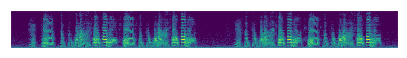

In [69]:
i = 19
song_path = song_files[i]
song = avn.dataloading.SongFile(song_path)

song_data, __, __ = avn.dataloading.Utils.select_syll(song, onset = 0.1, offset = 4.3, padding = 0)
song.data = song_data

spectrogram = avn.plotting.make_spectrogram(song)
plot_spectrogram(spectrogram, song.sample_rate, figsize = (5, 0.5), out_path = 'B555_example_spectrogram.svg' )

In [70]:
import avn.acoustics

In [71]:
i = 19
song_path = song_files[i]
song = avn.dataloading.SongFile(song_path)

song_interval = avn.acoustics.SongInterval(song, onset = 0.1, offset = 4.3)

amplitude = song_interval.calc_amplitude()

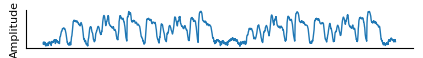

In [72]:
plt.figure(figsize = (5, 0.5))
plt.plot(amplitude, linewidth = 1)
plt.ylabel('Amplitude')
plt.xticks([])
plt.yticks([])
sns.despine()
plt.savefig('B555_example_song_amplitude.svg')

In [73]:
from scipy.signal.windows import hann
import scipy.signal
from numpy.fft import fft, fftfreq

In [74]:
max_frequency = 30

fs = len(amplitude) / song_interval.duration

#take first derivative of amplitude 
amplitude = np.diff(amplitude)

#Center the amplitude at 0 by subtracting the mean
amplitude = (amplitude - np.mean(amplitude))

#Apply a hanning window to the amplitude. This will reduce spectral leakage. 
hann_window = hann(len(amplitude))
amplitude = amplitude * hann_window

#pad to make spectrum smoother with more interpolated values
amplitude = np.pad(amplitude, (50000, 50000))

#apply a bandpass filter to the amplitude
filter_bandpass = scipy.signal.firwin(101, cutoff=[1, 500], fs = fs, pass_zero=False)
amplitude = scipy.signal.lfilter(filter_bandpass, [1.0], amplitude)

#Calculate the spectrum of the amplitude
rhythm_spectrum = abs(fft(amplitude))
#get the frequency corresponding to each value in the rhythm spectrum
frequency_bands = fftfreq(len(amplitude), d = round(1/fs, 6)) 

#select only the portion of the rhythm spectrum below max_frequency.
rhythm_spectrum = rhythm_spectrum[(frequency_bands > 0) & (frequency_bands < max_frequency)]


In [75]:
rhythm_spectrum.shape

(2846,)

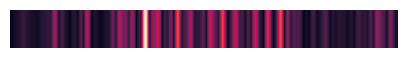

In [76]:
plt.figure(figsize = (5, 0.5))
sns.heatmap(rhythm_spectrum.reshape(2846, 1).T, cbar = False)
plt.yticks([])
plt.xticks([])
plt.xlabel('')
plt.savefig('B447_example_bout_spectrum.png')

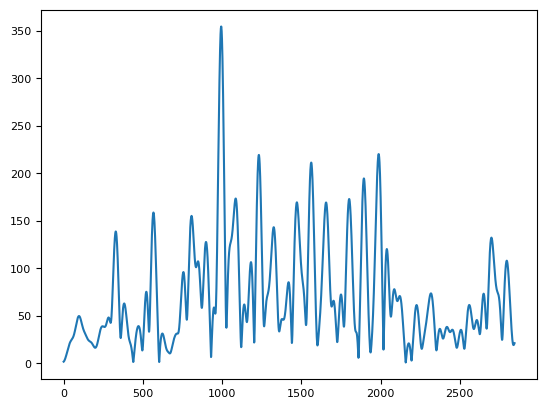

In [58]:
plt.plot(rhythm_spectrum)

## Additional Examples

In [32]:
Bird_ID = 'R629'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short fo

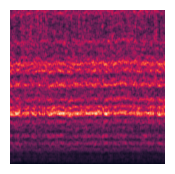

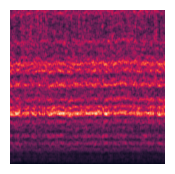

In [34]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'R629_rhythm_spectrogram.png')

In [35]:
Bird_ID = 'G587'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short fo

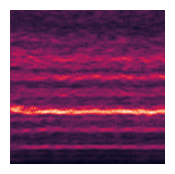

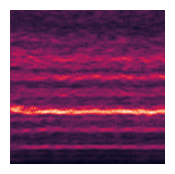

In [36]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'G587_rhythm_spectrogram.png')

In [39]:
Bird_ID = 'G592'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


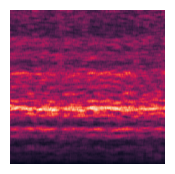

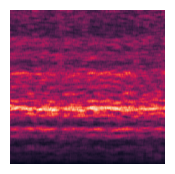

In [40]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'G592_rhythm_spectrogram.png')

In [42]:
Bird_ID = 'G668'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short fo

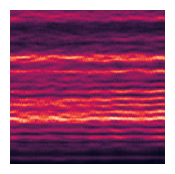

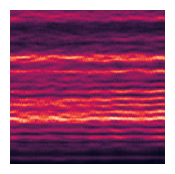

In [43]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'G668_rhythm_spectrogram.png')

In [45]:
Bird_ID = 'O510'
song_folder_path = 'D:\\Final_Bird_Dataset\\UTSW_Pupils\\' + Bird_ID + "\\"

rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


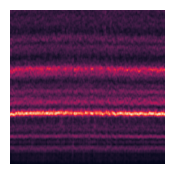

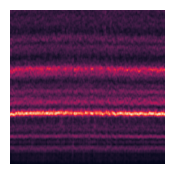

In [46]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'O510_rhythm_spectrogram.png')

## Juvenile Examples

In [7]:
Bird_ID = 'O833_51'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'E:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


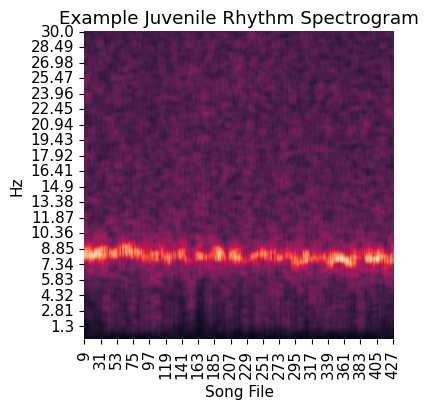

In [8]:
__ = rhythm_analysis.plot_rhythm_spectrogram(smoothing_window=10, 
                                        figsize = (4,4), 
                                        title = 'Example Juvenile Rhythm Spectrogram')

In [47]:
Bird_ID = 'S855_51'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'D:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)


file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


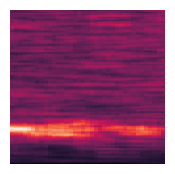

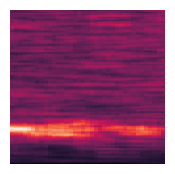

In [48]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'S855_51_rhythm_spectrogram.png')

In [49]:
Bird_ID = 'Y856_50'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'D:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
# fig = plot_rhythm_spectrogram(rhythm_analysis, smoothing_window=10, 
#                                         figsize = (2,2), 
#                                         title = '', 
#                                         out_path = 'Y856_juvenile_tiny_rhythm_spectrogram.png')

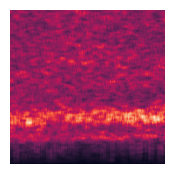

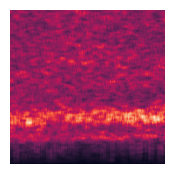

In [50]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'Y856_50_rhythm_spectrogram.png')

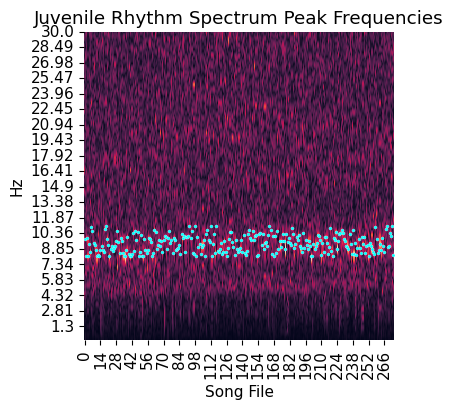

In [13]:
peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
fig = rhythm_analysis.plot_peak_frequencies(figsize = (4, 4), title = 'Juvenile Rhythm Spectrum Peak Frequencies', s = 5)

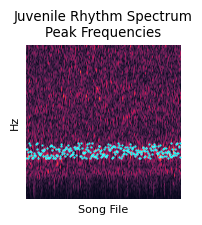

In [51]:
peak_frequencies = rhythm_analysis.get_refined_peak_frequencies(freq_range=3)
fig = rhythm_analysis.plot_peak_frequencies(figsize = (2, 2), title = 'Juvenile Rhythm Spectrum\nPeak Frequencies', s = 2)
plt.xticks([])
plt.yticks([])
fig.savefig('Y856_50_peak_rhythm_spectrum_frequencies.png', transparent = True, bbox_inches='tight')

In [ ]:
fig = rhythm_analysis.plot_peak_frequencies()

In [52]:
Bird_ID = 'Y472_50'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'D:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
# __ = rhythm_analysis.plot_rhythm_spectrogram(smoothing_window=10, 
#                                         figsize = (4,4), 
#                                         title = 'Example Juvenile Rhythm Spectrogram')

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


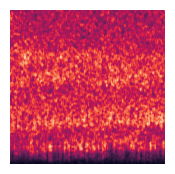

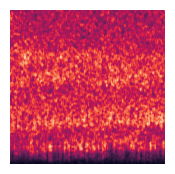

In [53]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'Y472_50_rhythm_spectrogram.png')

In [54]:
Bird_ID = 'O472_50'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'D:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
# __ = rhythm_analysis.plot_rhythm_spectrogram(smoothing_window=10, 
#                                         figsize = (4,4), 
#                                         title = 'Example Juvenile Rhythm Spectrogram')

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short fo

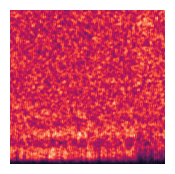

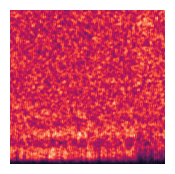

In [55]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'O472_50_rhythm_spectrogram.png')

In [57]:
Bird_ID = 'R833_51'

#create RhythmAnalysis object
rhythm_analysis = timing.RhythmAnalysis(Bird_ID)
#set path to song files
song_folder_path = 'D:\\Juveniles\\Single_day_per_juvenile\\' + Bird_ID + "\\"
#create rhythm spectrogram
rhythm_spectrogram = rhythm_analysis.make_rhythm_spectrogram(song_folder_path = song_folder_path)
# __ = rhythm_analysis.plot_rhythm_spectrogram(smoothing_window=10, 
#                                         figsize = (4,4), 
#                                         title = 'Example Juvenile Rhythm Spectrogram')

file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.
file is too short for the specified frame_length, n_windows and hop_length. File will be skipped.


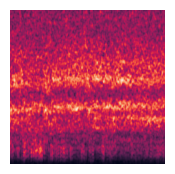

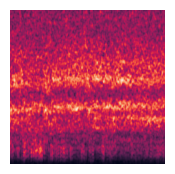

In [59]:
plot_rhythm_spectrogram(self = rhythm_analysis, smoothing_window=10, 
                                        figsize = (2, 2), 
                                        title = '', out_path = 'R833_51_rhythm_spectrogram.png')